In [2]:
import pandas as pd

def create_df_from_sheet(sheet: str) -> pd.DataFrame:
    df = pd.read_excel("./all data(from manon).xlsx", sheet_name=sheet)
    df.columns = df.iloc[1]
    df = df.iloc[2:]
    if len(df.columns) > 4:
        df.drop(columns=df.columns[-2:], axis=1, inplace=True)
    df.columns = ["timestamp", "no_units", "RangeCAL_uS", "SkinResistanceCAL_kOhms"]
    return df


def plot_df(df: pd.DataFrame):
    df.iloc[:, [0, 1]].plot()
    df.iloc[:, [0, 2]].plot()
    df.iloc[:, [0, 3]].plot()
    # print("hi mom")

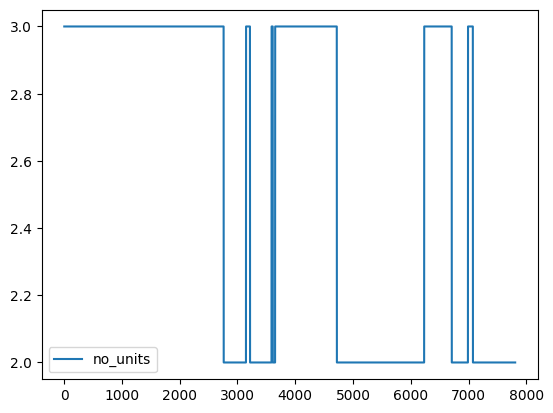

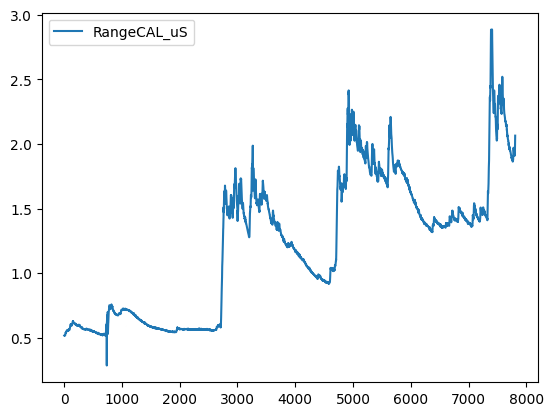

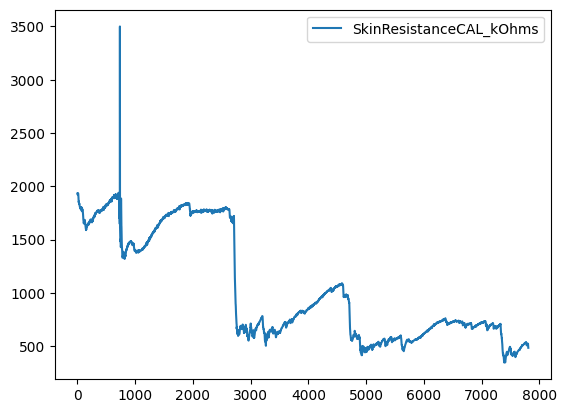

In [3]:
test612_1 = create_df_from_sheet("612_1")
plot_df(test612_1)

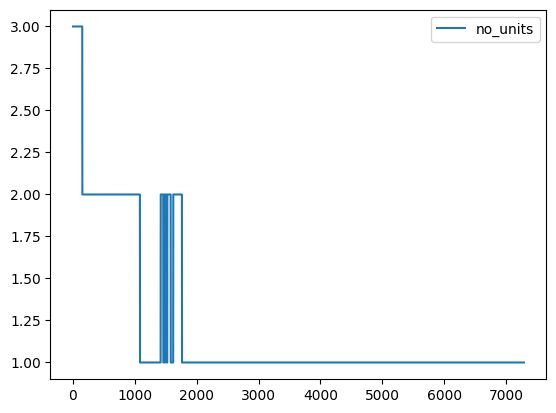

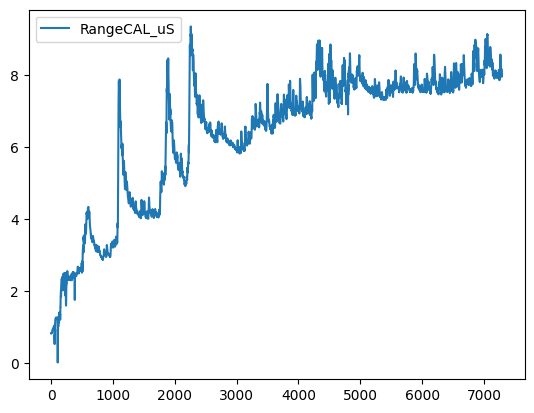

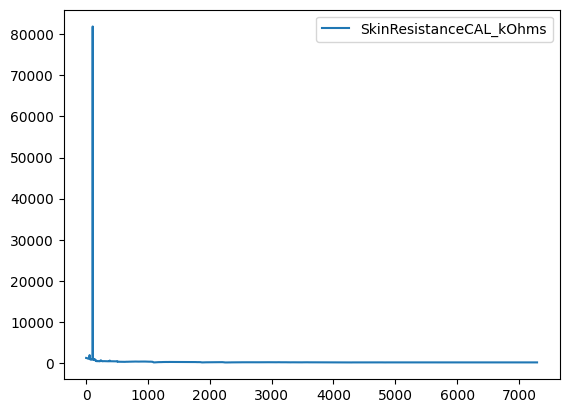

In [4]:
test612_2 = create_df_from_sheet("612_2")
plot_df(test612_2)

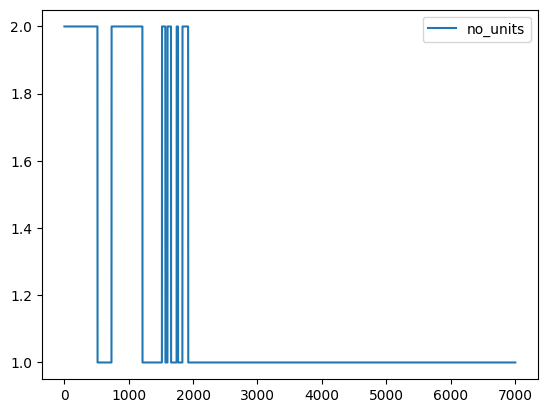

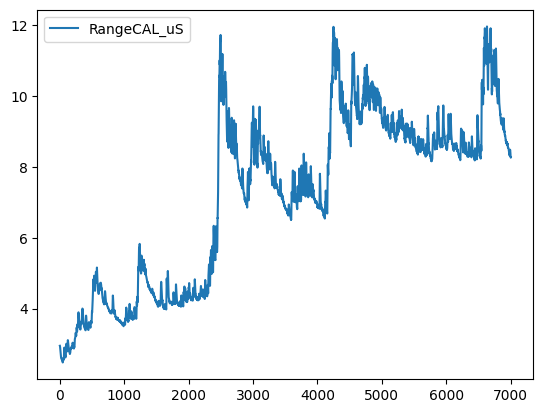

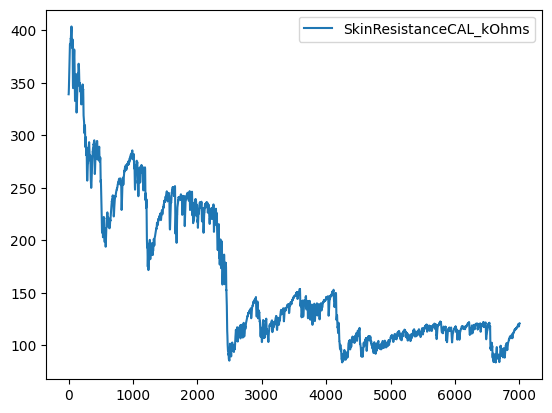

In [5]:
test612_3 = create_df_from_sheet("612_3")
plot_df(test612_3)

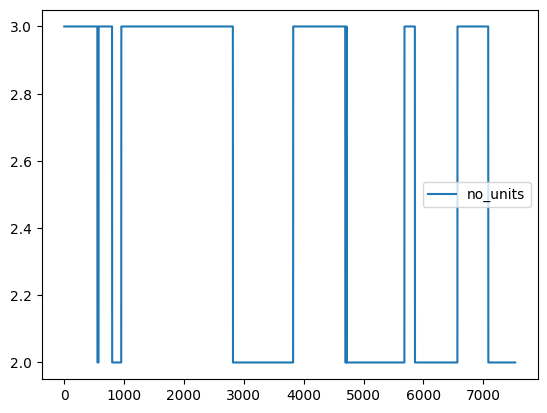

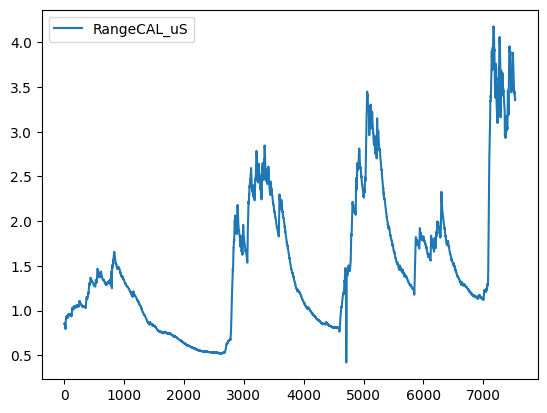

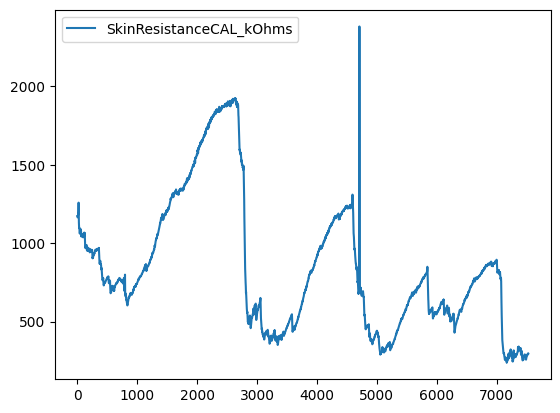

In [6]:
test612_4 = create_df_from_sheet("612_4")
plot_df(test612_4)

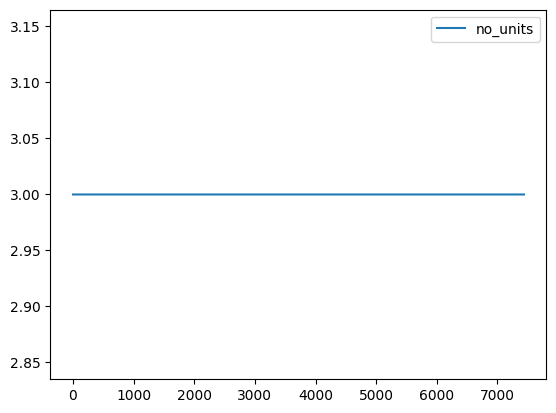

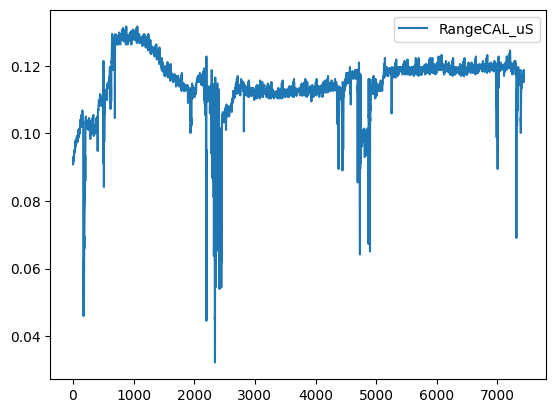

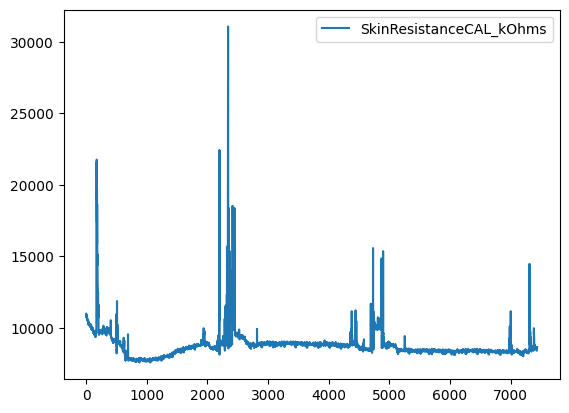

In [7]:
test612_5 = create_df_from_sheet("612_5")
plot_df(test612_5)

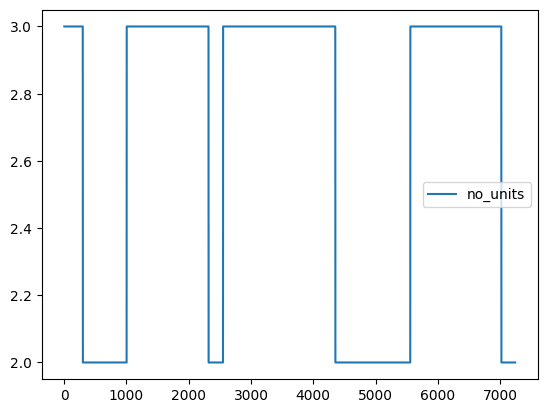

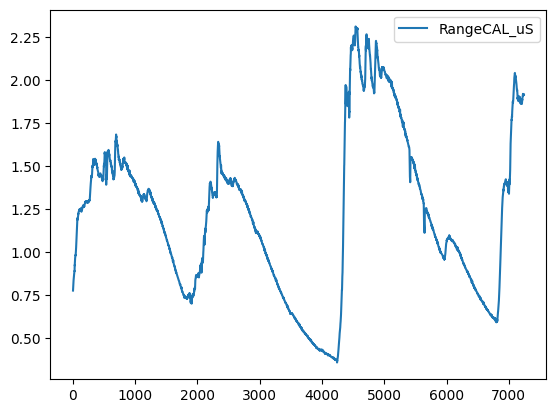

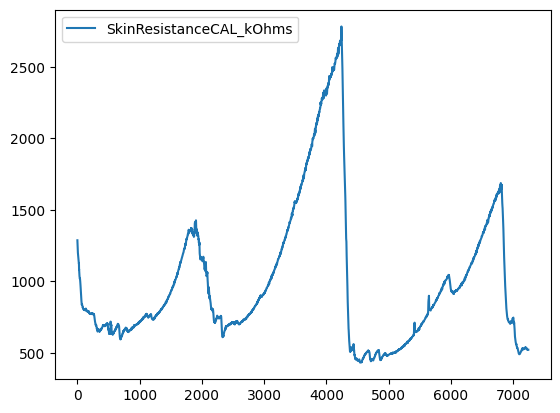

In [8]:
test612_6 = create_df_from_sheet("612_6")
plot_df(test612_6)

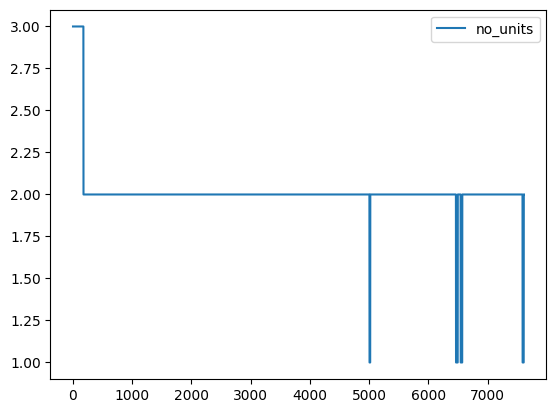

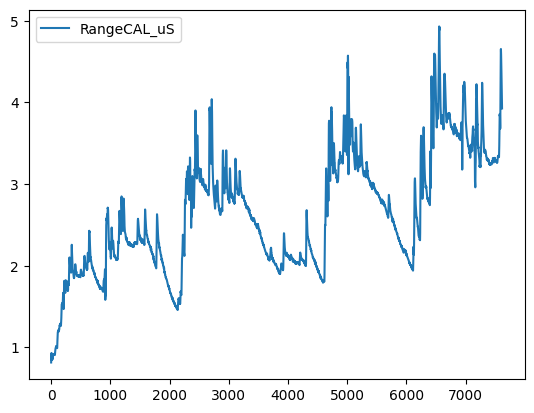

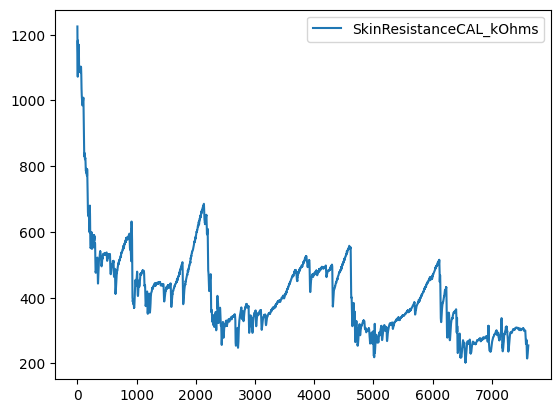

In [9]:
test612_7 = create_df_from_sheet("612_7")
plot_df(test612_7)

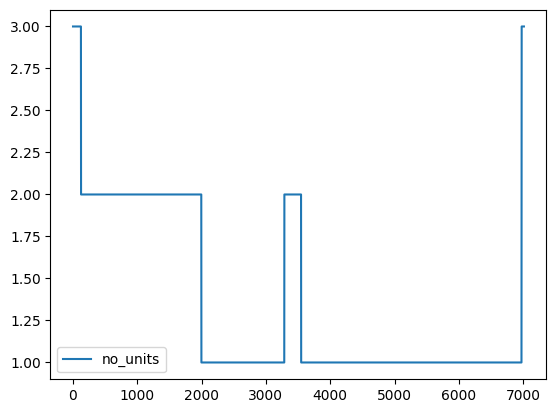

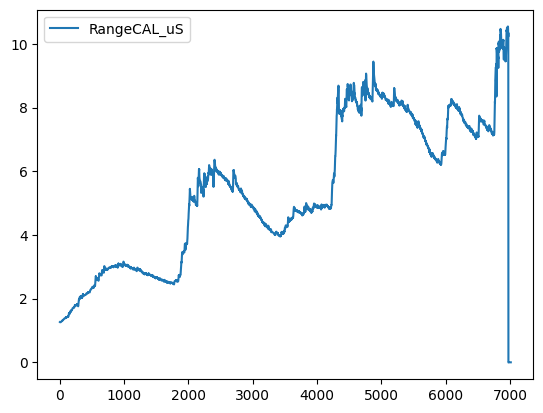

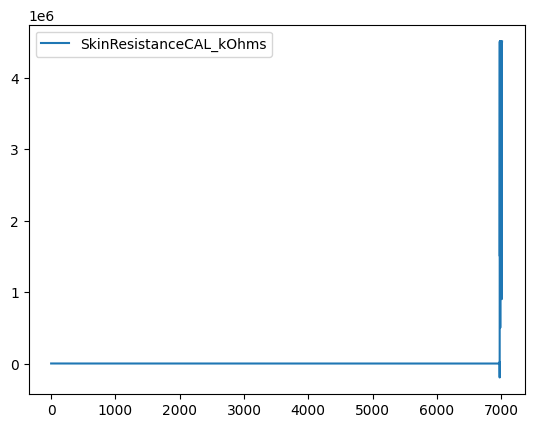

In [10]:
test712_1 = create_df_from_sheet("712_1")
plot_df(test712_1)

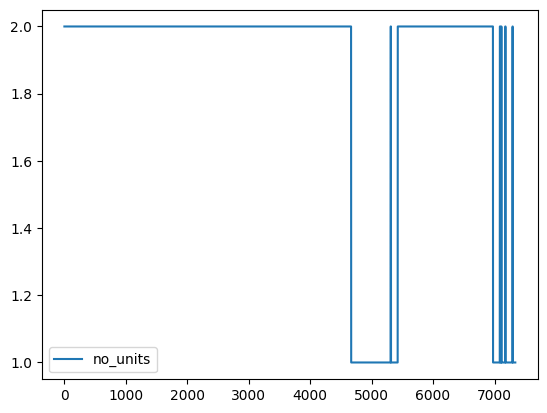

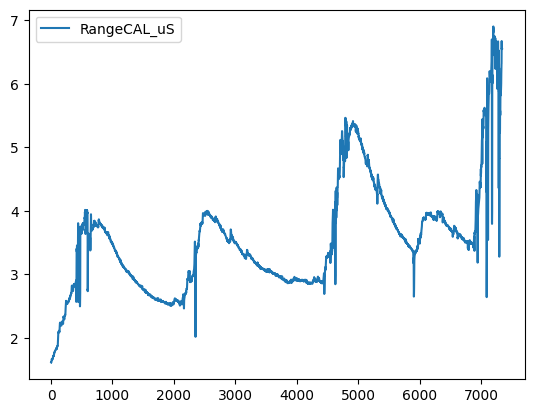

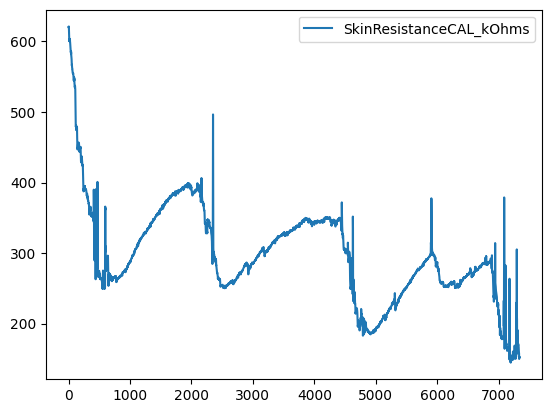

In [11]:
test712_2 = create_df_from_sheet("712_2")
plot_df(test712_2)

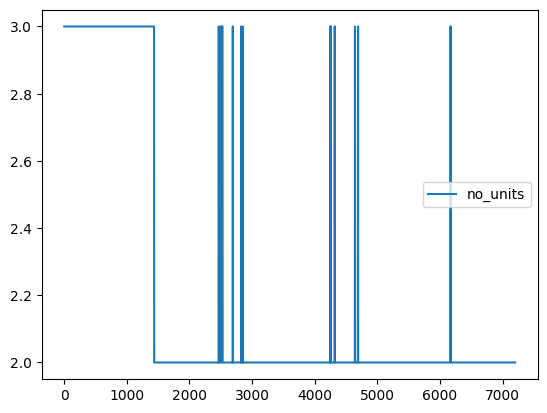

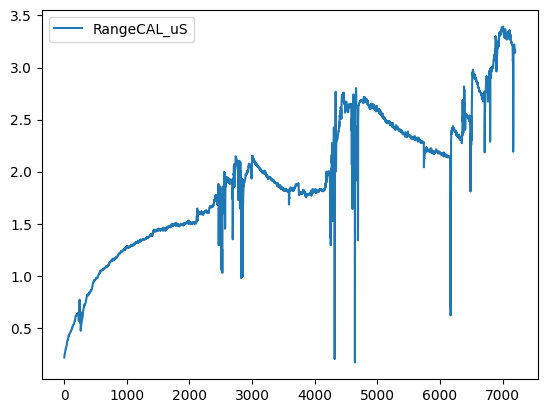

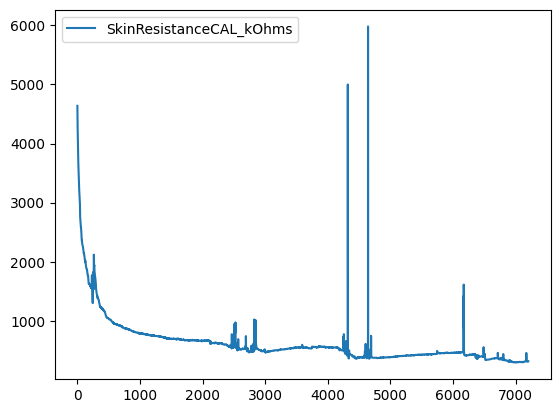

In [12]:
test712_3 = create_df_from_sheet("712_3")
plot_df(test712_3)

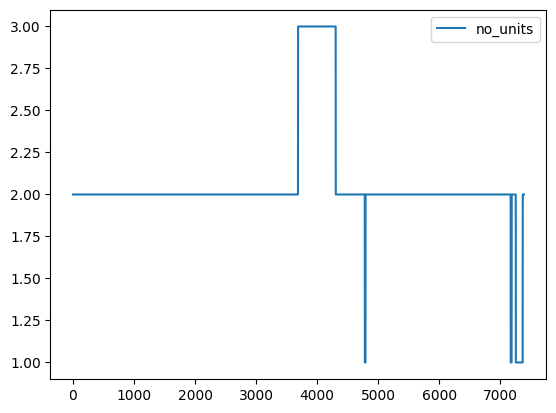

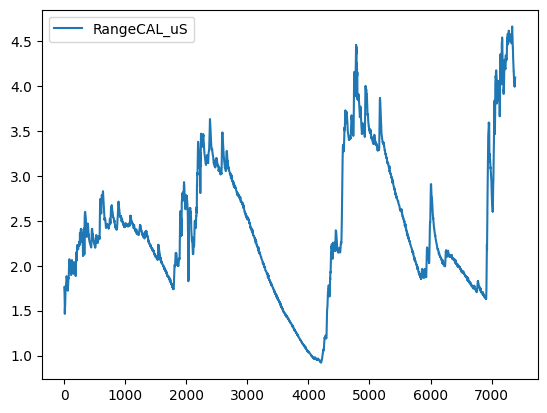

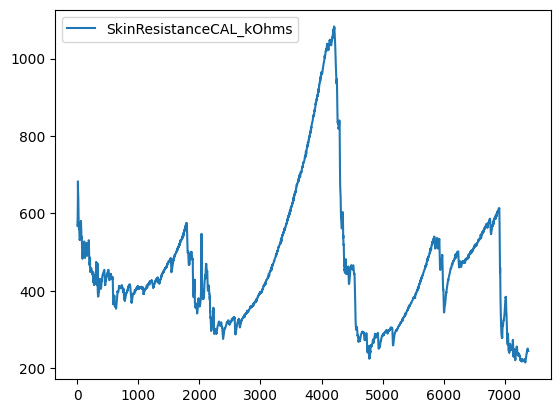

In [13]:
test712_4 = create_df_from_sheet("712_4")
plot_df(test712_4)

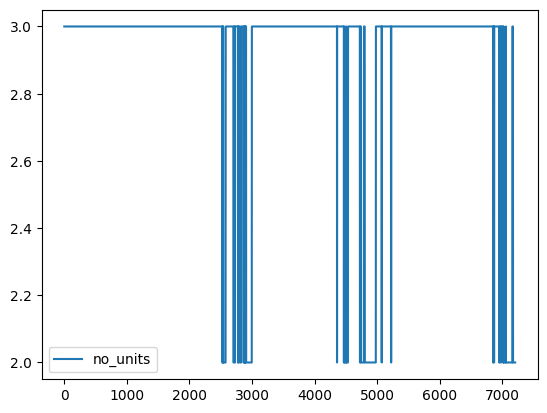

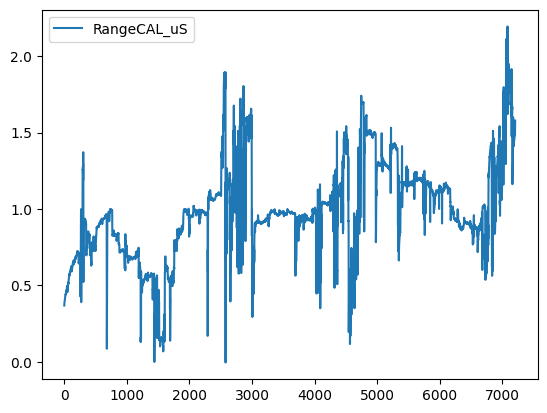

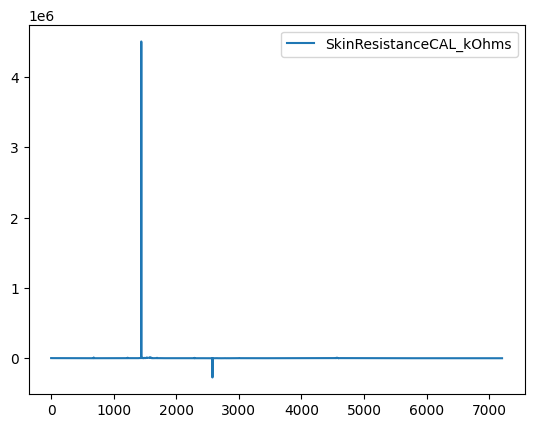

In [14]:
test712_5 = create_df_from_sheet("712_5")
plot_df(test712_5)

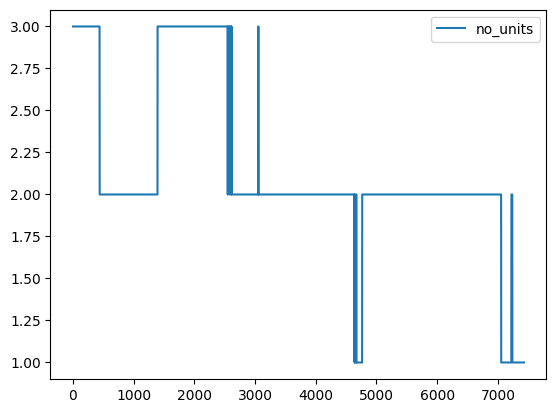

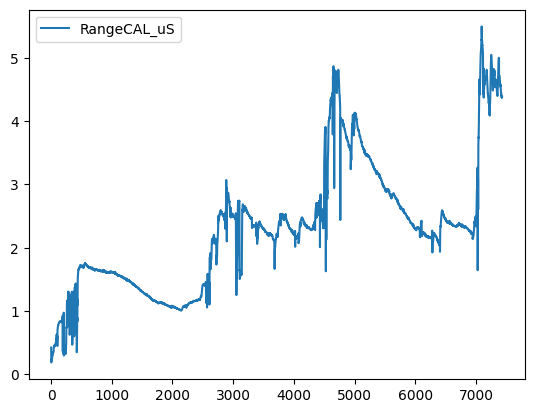

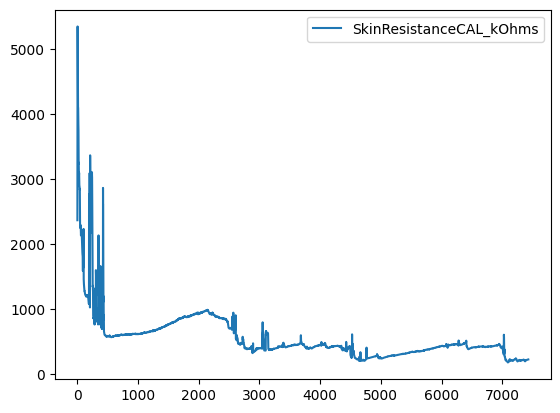

In [15]:
test712_6 = create_df_from_sheet("712_6")
plot_df(test712_6)

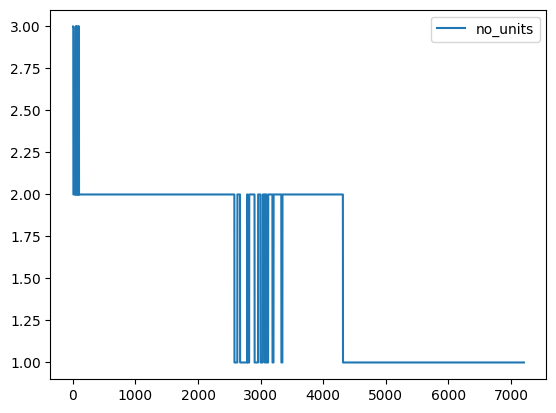

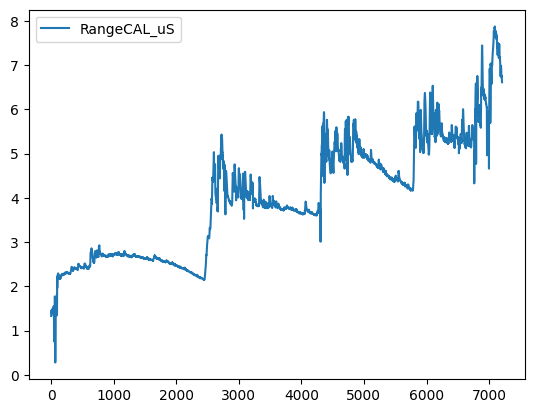

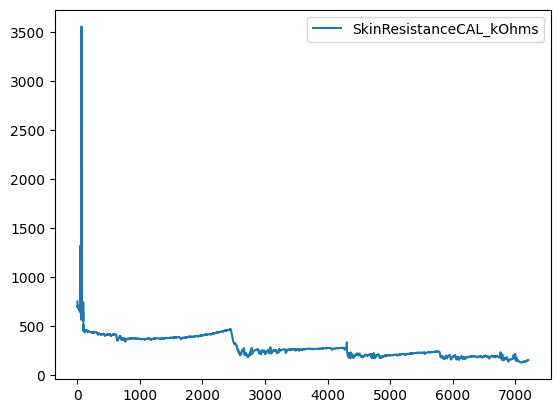

In [16]:
test712_7 = create_df_from_sheet("712_7")
plot_df(test712_7)

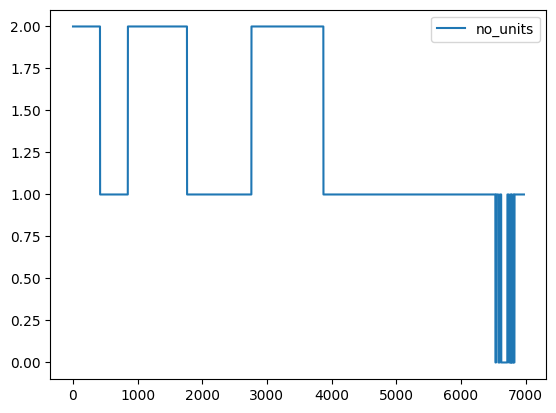

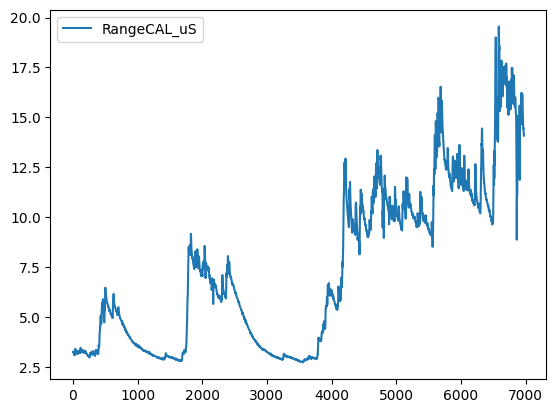

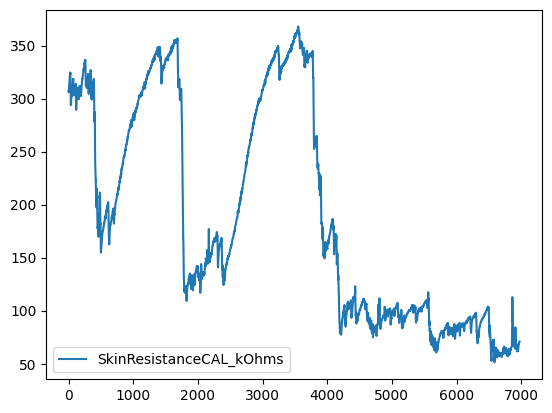

In [17]:
test712_8 = create_df_from_sheet("712_8")
plot_df(test712_8)

In [41]:
dfTemp = test712_6
df1_1 = dfTemp.iloc[:, [0, 1]]
df1_2 = dfTemp.iloc[:, [0, 2]]
df1_3 = dfTemp.iloc[:, [0, 3]]
df1_2

timestamp RangeCAL_uS
2     2021/12/07 16:33:05.584    0.422466
3     2021/12/07 16:33:05.834    0.284826
4     2021/12/07 16:33:06.084    0.188478
5     2021/12/07 16:33:06.334    0.187146
6     2021/12/07 16:33:06.584     0.18759
...                       ...         ...
7424  2021/12/07 17:04:01.776    4.377736
7425  2021/12/07 17:04:02.026    4.377736
7426  2021/12/07 17:04:02.276    4.372631
7427  2021/12/07 17:04:02.526    4.377736
7428  2021/12/07 17:04:02.776    4.377736

[7427 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 2 to 7428
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    7427 non-null   object
 1   RangeCAL_uS  7427 non-null   object
dtypes: object(2)
memory usage: 116.2+ KB


/tmp/ipykernel_1863/55451263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['RollingMean'] = df1_2['RangeCAL_uS'].rolling(40).mean() # rolling average of 10 seconds (4 units = 1 second)


<AxesSubplot: >

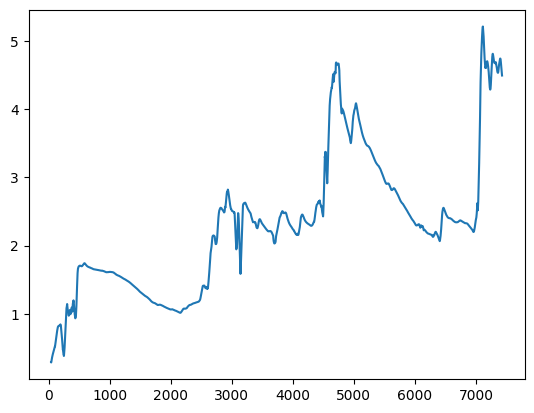

In [42]:

df1_2.info()
df1_2['RollingMean'] = df1_2['RangeCAL_uS'].rolling(40).mean() # rolling average of 10 seconds (4 units = 1 second)

df1_2['RollingMedian'] = df1_2['RangeCAL_uS'].rolling(20).median() # rolling median of 10 seconds
df1_2['deltaMean'] = df1_2.RollingMean.diff(periods =1)
df1_2['deltaMedian'] = df1_2.RollingMedian.diff(periods =1)
df1_2['RollingMean'].plot()

In [43]:
anomaly_detection_df = df1_2[['timestamp', 'deltaMean']].copy().dropna()
anomaly_detection_df = anomaly_detection_df.reset_index()
# anomaly_detection_df['time_index'] = anomaly_detection_df.index
anomaly_detection_df

index                timestamp  deltaMean
0        42  2021/12/07 16:33:15.584  -0.001776
1        43  2021/12/07 16:33:15.834   0.002420
2        44  2021/12/07 16:33:16.084   0.005850
3        45  2021/12/07 16:33:16.334   0.006061
4        46  2021/12/07 16:33:16.584   0.006172
...     ...                      ...        ...
7382   7424  2021/12/07 17:04:01.776  -0.008041
7383   7425  2021/12/07 17:04:02.026  -0.007658
7384   7426  2021/12/07 17:04:02.276  -0.007275
7385   7427  2021/12/07 17:04:02.526  -0.006892
7386   7428  2021/12/07 17:04:02.776  -0.006892

[7387 rows x 3 columns]

/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


      index                timestamp  deltaMean    scores  anomaly
164     206  2021/12/07 16:33:56.582  -0.010412 -0.009015       -1
219     261  2021/12/07 16:34:10.332   0.018204 -0.001242       -1
222     264  2021/12/07 16:34:11.082   0.019725 -0.033894       -1
223     265  2021/12/07 16:34:11.332   0.019203 -0.010603       -1
228     270  2021/12/07 16:34:12.582   0.018371 -0.005536       -1
...     ...                      ...        ...       ...      ...
7213   7255  2021/12/07 17:03:19.528   0.017103 -0.011318       -1
7220   7262  2021/12/07 17:03:21.278   0.017634 -0.008019       -1
7222   7264  2021/12/07 17:03:21.778   0.017310 -0.006224       -1
7223   7265  2021/12/07 17:03:22.028   0.016269 -0.006996       -1
7367   7409  2021/12/07 17:03:58.027  -0.010210 -0.008666       -1

[369 rows x 5 columns]
[164, 219, 222, 223, 228, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 248, 310, 339, 340, 348, 350, 354, 376, 382, 383, 392, 406, 407, 410, 411, 412, 413, 414, 415, 4

<AxesSubplot: >

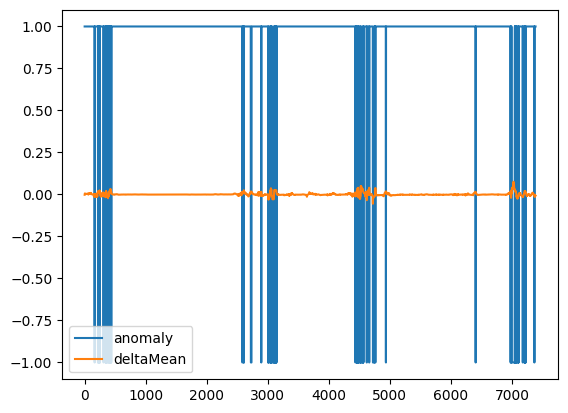

In [44]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(random_state=0, contamination=0.05, n_estimators=200, max_samples=0.7)
model_data = anomaly_detection_df[['deltaMean']]
IF.fit(model_data)

anomaly_detection_df['scores']=IF.decision_function(model_data)
anomaly_detection_df['anomaly']=IF.predict(model_data)

anomaly=anomaly_detection_df.loc[anomaly_detection_df['anomaly']==-1]
anomaly_index=list(anomaly.index)

print(anomaly)
print(anomaly_index)

anomaly_detection_df[['anomaly','deltaMean']].plot()